In [1]:
# path= 'Data/1_raw2freq/S1_freq.csv.gz' # all SNPs MAF (first column country-age)
path= 'Data/1_raw2freq/S1_freq_filtered.csv.gz' # MAF for SNPs in 80% of samples (first column country-age)
# path= 'Data/1_raw2freq/S1_freq_SD.csv.gz' # SD for all SNPs (without first annotation column)
# path= 'Data/1_raw2freq/S1_freq_filtered_SD.csv.gz' # SD for SNPs in 80% of samples (without first annotation column)

In [2]:
import pandas as pd
data = pd.read_csv(path, sep='\t', header=None, compression='gzip')

In [3]:
# make a list from column
annot = ['Denmark_3',
         'Denmark_4',
         'Denmark_2',
         'Estonia_6',
         'Estonia_5',
         'Kazakhstan_2',
         'Kazakhstan_3',
         'Romania_6',
         'Romania_5',
         'Romania_7',
         'Romania_9',
         'Romania_8',
         'Jordan_4',
         'Macedonia_7',
         'Jordan_8',
         'Jordan_9',
         'TheNetherlands_3',
         'TheNetherlands_4',
         'Austria_7',
         'Austria_6',
         'Poland_5',
         'Poland_4',
         'Poland_3',
         'Lithuania_6',
         'Lithuania_7',
         'Lithuania_4',
         'Lithuania_3',
         'Lithuania_8',
         'Lithuania_2',
         'Croatia_4',
         'Croatia_2',
         'Croatia_7',
         'Croatia_6',
         'Croatia_3',
         'Croatia_9',
         'Croatia_5',
         'Armenia_6',
         'Armenia_4',
         'Armenia_5',
         'Armenia_3',
         'Armenia_2',
         'Greece_7',
         'Greece_5',
         'Greece_6',
         'Greece_8',
         'Greece_3',
         'Sweden_4',
         'Sweden_3',
         'Sweden_7',
         'Sweden_1',
         'Portugal_4',
         'Italy_4',
         'Italy_5',
         'Italy_3',
         'France_4',
         'France_3',
         'France_6',
         'Israel_5',
         'Israel_8',
         'Iran_9',
         'Iran_2',
         'Iran_6',
         'Iran_5',
         'Iran_7',
         'Bulgaria_4',
         'Bulgaria_6',
         'Bulgaria_3',
         'Bulgaria_7',
         'Bulgaria_5',
         'Bulgaria_2',
         'Serbia_7',
         'Serbia_6',
         'Serbia_8',
         'Spain_4',
         'Spain_3',
         'Spain_7',
         'Spain_5',
         'Spain_6',
         'Spain_9',
         'Turkey_8',
         'Turkey_4',
         'Turkey_5',
         'Turkey_7',
         'Latvia_7',
         'Latvia_5',
         'Latvia_6',
         'Latvia_8',
         'Latvia_4',
         'Latvia_2',
         'Ukraine_8',
         'Ukraine_7',
         'Ukraine_4',
         'Ukraine_5',
         'Ukraine_6',
         'CzechRepublic_4',
         'CzechRepublic_6',
         'CzechRepublic_5',
         'CzechRepublic_3',
         'Russia_7',
         'Russia_2',
         'Russia_3',
         'Russia_4',
         'Russia_5',
         'Germany_9',
         'Germany_4',
         'Germany_7',
         'Germany_6',
         'Germany_3',
         'Germany_5',
         'Hungary_3',
         'Hungary_4',
         'Hungary_6',
         'Hungary_5',
         'Hungary_7',
         'Hungary_2',
         'UnitedKingdom_3',
         'UnitedKingdom_5',
         'UnitedKingdom_4',
         'UnitedKingdom_2']


In [4]:
data

,0,1,2,3,4,5,6,7,8,9,...,86676,86677,86678,86679,86680,86681,86682,86683,86684,86685
0,Denmark_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Denmark_4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000
2,Denmark_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Estonia_6,0.500000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.500000,0.000000,0.000000,0.500000
4,Estonia_5,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Hungary_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
115,UnitedKingdom_3,0.086957,0.195652,0.326087,0.065217,0.260870,0.304348,0.086957,0.021739,0.369565,...,0.043478,0.239130,0.130435,0.260870,0.152174,0.152174,0.173913,0.239130,0.130435,0.217391
116,UnitedKingdom_5,0.129032,0.161290,0.193548,0.096774,0.161290,0.225806,0.032258,0.032258,0.258065,...,0.032258,0.322581,0.064516,0.225806,0.096774,0.064516,0.032258,0.290323,0.096774,0.129032
117,UnitedKingdom_4,0.090909,0.060606,0.333333,0.121212,0.121212,0.060606,0.030303,0.030303,0.151515,...,0.030303,0.424242,0.090909,0.303030,0.242424,0.121212,0.090909,0.333333,0.181818,0.121212


In [8]:
df= data.iloc[:,1:] # remove first column
# df=data

In [9]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# spherical or not

In [10]:
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np


def is_data_spherical(X):
    # Compute the centroid of the data
    centroid = np.mean(X, axis=0)

    # Calculate the Euclidean distances from each point to the centroid
    distances = euclidean_distances(X, [centroid]).ravel()

    # Compute the mean and standard deviation of the distances
    mean_distance = np.mean(distances)
    std_distance = np.std(distances)

    # Determine if the data is spherical
    if std_distance / mean_distance < 0.5:
        return True
    else:
        return False


print(is_data_spherical(df))


True


## silhouette score

In [ ]:
# plot_silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np


def plot_silhouette_score(X, k_min=2, k_max=20):
    # Create a range of K values
    k_range = range(k_min, k_max+1)

    # Create an empty list to store the silhouette scores
    silhouette_scores = []

    # Loop through the range of K values and calculate the silhouette score for each value
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=0)
        labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)

    # Plot the silhouette scores for each K value
    plt.plot(k_range, silhouette_scores)
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette score for K-means clustering')
    plt.xticks(np.arange(k_min, k_max+1, step=2))
    plt.show()


# plot_silhouette_score(df)


# Kmeans

In [ ]:

# # Scale the data
# import matplotlib.pyplot as plt
# scaler = StandardScaler()

# # from column 1 to the end
# data2 = scaler.fit_transform(df)

# # Choose the number of clusters
# # k = 35
# # Initialize K centroids randomly
# kmeans = KMeans(n_clusters=k, init='random', n_init=10)

# # Fit the K-means model to the data
# kmeans.fit(data2)

# # Get the cluster assignments for each SNP
# labels = kmeans.labels_

# # Get the cluster centers
# centroids = kmeans.cluster_centers_

# # Get the sum of squared distances of samples to their closest cluster center
# inertia = kmeans.inertia_

# # # from first column of data get the country names and store in a list
# # country = data.iloc[:, 0].to_list()

# # create a dictionary with country as key and labels as value
# country_labels = dict(zip(annot, labels))


# # Print the results
# # print('Cluster labels: %s' % country_labels)
# # print('Cluster centroids: %s' % centroids)
# # print('Sum of squared distances: %s' % inertia)

# # Plot the results
# plt.scatter(data2[:, 0], data2[:, 1], c=labels, cmap='rainbow')
# plt.show()

# # make a dataframe with country_lables and counts number of each cluster
# how = pd.DataFrame.from_dict(country_labels, orient='index', columns=['cluster'])
# how['count'] = 1
# how.groupby(['cluster']).count()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score

def plot_silhouette(X, k_range):
    """
    Plots the Silhouette Coefficient for Spectral Clustering for a given dataset and range of k values.

    Parameters:
    X (array-like): The dataset to be clustered.
    k_range (range): The range of k values to try for the number of clusters.

    Returns:
    None
    """
    silhouette_scores = []
    # Scale the data
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    for k in k_range:
        model = SpectralClustering(n_clusters=k, affinity='nearest_neighbors')
        labels = model.fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)

        # Compute the Silhouette Coefficient for each sample
        sample_silhouette_values = silhouette_samples(X, labels)

        y_lower = 10
        for i in range(k):
            # Aggregate the silhouette scores for samples belonging to cluster i
            ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = plt.cm.nipy_spectral(float(i) / k)
            plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10

    # Plot the Silhouette Coefficient for each k value
    plt.figure(figsize=(10, 8))
    plt.plot(k_range, silhouette_scores, 'bo-', linewidth=1)
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Coefficient')
    plt.title('Silhouette Coefficient for Spectral Clustering')
    plt.show()


In [12]:
# Load your data into a variable, X

# Set the range of k values to try
k_range = range(6, 22)

# Call the function to plot the Silhouette Coefficient
plot_silhouette(df, k_range)


KeyboardInterrupt: 

# Spectral Clustering

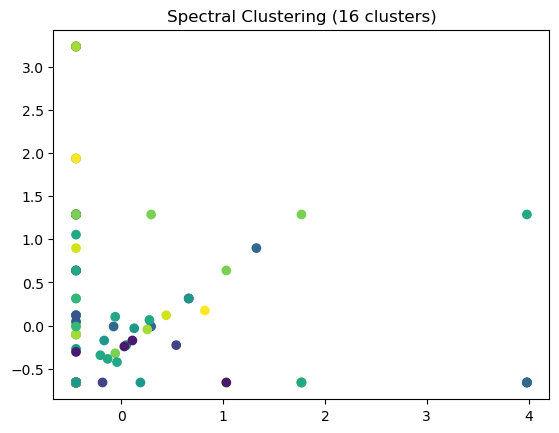

,count
cluster,
0,7
1,7
2,3
3,8
4,8
5,7
6,2
7,4
8,12


In [13]:
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(df)

k= 16 # 2, 6, 15, 18 (best silhouette score)

# Perform spectral clustering
n_clusters = k  # Number of clusters
clustering = SpectralClustering(
    n_clusters=n_clusters, eigen_solver='arpack', affinity="nearest_neighbors", random_state=42).fit(X)


# create a dictionary with country as key and labels as value
country_labels_S = dict(zip(annot, clustering.labels_))

labels=clustering.labels_

# Visualize the clustering result
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_)
plt.title("Spectral Clustering ({} clusters)".format(n_clusters))
plt.show()

# make a dataframe with country_lables and counts number of each cluster
how = pd.DataFrame.from_dict(country_labels_S, orient='index', columns=['cluster'])
how['count'] = 1
how.groupby(['cluster']).count()


# export to csv and get location

In [14]:
import pandas as pd
my_clusters = pd.DataFrame(columns=['country', 'date', 'cluster'])

for key, value in country_labels_S.items():
    a = key.split('_')
    b = a[0]
    c = int(a[1])*1000
    d = value
    e = f'{b}\t{c}\t{d}'
    # add to a my_clusters
    my_clusters = my_clusters.append(
        {'country': b, 'date': c, 'cluster': d}, ignore_index=True)

# split country name if find capital letter in the middle of the string
# and add a space before the capital letter
my_clusters['country'] = my_clusters['country'].str.replace(
    r'(\w)([A-Z])', r'\1 \2')
name=path.split('/')[-1].split('.')[0]
my_clusters.to_csv(f'Data/2_clustring/{name}_clusters.csv', sep='\t', index=False)



/tmp/ipykernel_230463/948637380.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  my_clusters['country'] = my_clusters['country'].str.replace(


In [15]:
from geopy.geocoders import Nominatim


# Initialize a geolocator object
geolocator = Nominatim(user_agent='my-app')

# Define a function to get the latitude and longitude of a country
def get_coordinates(country):
    location = geolocator.geocode(country)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None
# Apply the function to the 'country' column and create a new DataFrame
coordinates = my_clusters['country'].apply(get_coordinates).apply(pd.Series)
coordinates.columns = ['latitude', 'longitude']
df_contac = pd.concat([my_clusters, coordinates], axis=1)

name=path.split('/')[-1].split('.')[0]
df_contac.to_csv(f'Data/2_clustring/{name}_clusters_location.csv', sep='\t', index=False)


In [16]:
# convert each annot like 'Afghanistan_3" to 'Afghanistan 3000'
annot2 = []
for i in annot:
    a = i.split('_')
    b = a[0]
    c = a[1]
    d = f'{b} {c}000'
    annot2.append(d)

# UMAP

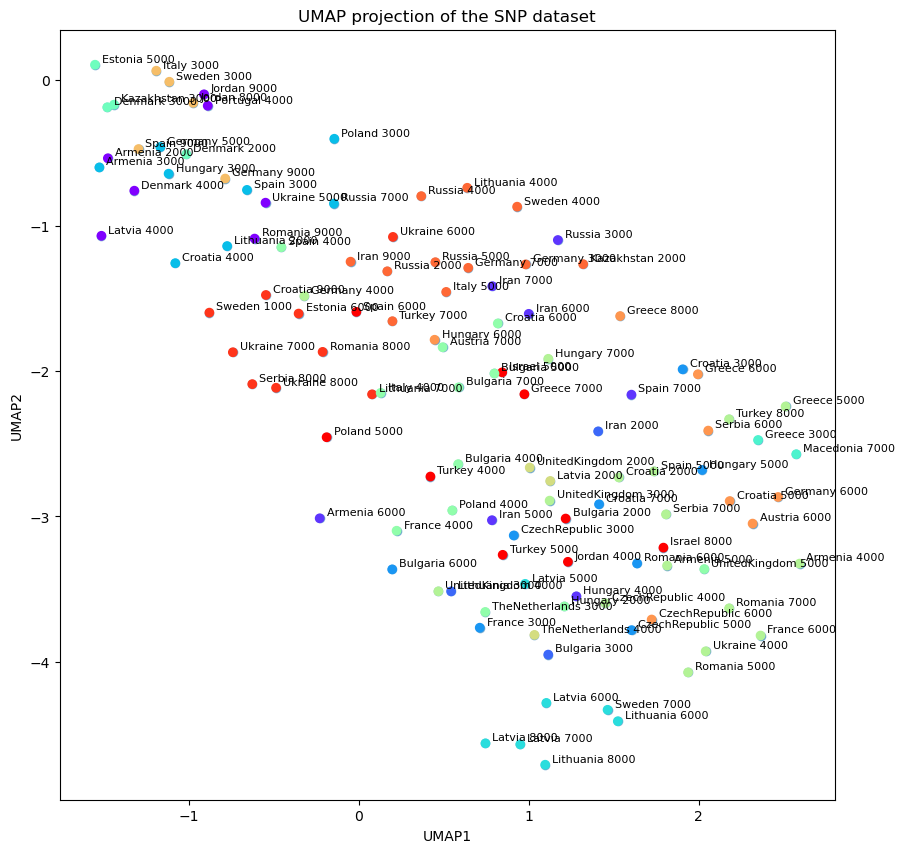

In [17]:
import numpy as np
import pandas as pd
import umap.umap_ as umap
import matplotlib.pyplot as plt


# Apply UMAP to the dataset
reducer = umap.UMAP()
# df_umap = reducer.fit_transform(df)
df_umap = umap.UMAP(min_dist=0.1, random_state=21).fit_transform(df)
# size of the figure
plt.figure(figsize=(10, 10))

# Visualize the UMAP results
plt.scatter(df_umap[:, 0], df_umap[:, 1], alpha=0.5)
# color the points by their cluster assignment
plt.scatter(df_umap[:, 0], df_umap[:, 1], c=labels, cmap='rainbow')


# add a annotation very small font size and close to the point
for i, txt in enumerate(annot2):
    plt.annotate(txt, (df_umap[i, 0], df_umap[i, 1]), fontsize=8, xytext=(
        5, 2), textcoords='offset points')



# add a title
plt.title('UMAP projection of the SNP dataset')
# add x and y labels
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
# save the figure
plt.savefig(f'Data/2_clustring/UMAP{name}.png', dpi=300)
plt.show()


